# Car Evaluation Analysis

## Summary

We aim to develop a Random Forest classification model to predict car acceptability categories: unacceptable (unacc), acceptable (acc), good (good), and very good (vgood). This prediction is based on categorical attributes such as price, maintenance cost, safety, and seating capacity. The data is sourced from the Car Evaluation dataset found in the UCI Machine Learning Repository (Bohanec, 1998). 

Our Random Forest model achieved an impressive overall accuracy of 94.68% and a strong Kappa statistic of 0.8822, indicating robust predictive performance and a strong agreement between predicted and actual classes. However, performance was heavily influenced by class balance, as shown in the confusion matrix. To enhance the model, we recommend addressing class imbalance through the use of class weighting. Overall, the model provides a highly accurate and interpretable approach to car acceptability classification, but further refinements could improve fairness across all categories. In summary, this analysis demonstrates how machine learning can be effectively applied to real-world decision-making in the automotive sector.

## Introduction

Evaluating car acceptability is a critical factor in decision-making within the automotive industry. It affects consumer choices regarding vehicle purchases, manufacturers' priorities, and dealership strategies. Car purchases represent one of the most significant financial decisions for households, with affordability being the primary barrier for many buyers. Price plays a crucial role in accessibility, particularly for budget-conscious consumers, such as first-time buyers or individuals in emerging markets.

According to Chiu et al. (2022), price dispersion positively impacts car acceptability. Because car purchases are high-cost, long-term investments, misaligned choices due to information asymmetry—such as undervaluing safety features—can lead to serious financial or safety repercussions (Canada, 2024). For instance, vehicles with poor safety ratings have been linked to higher accident rates. Consequently, Vrkljan et al. (2011) concluded that safety is considered the most important feature when purchasing a vehicle. Automating car evaluations helps buyers efficiently identify optimal vehicles, aligning with the trend toward data-driven consumer tools. Recognizing critical features, such as safety and price, reflects the industry's priorities in vehicle design.

This project aims to develop a classification model to predict car acceptability based on various features such as price, maintenance cost, safety, and seating capacity. This analysis uses the Car Evaluation dataset, which contains 1,728 instances and six features: buying price, maintenance cost, number of doors, seating capacity, luggage size, and safety rating. With an increasing number of car models available in the market, understanding how different attributes affect car classification can help streamline the evaluation process. The goal is to predict car acceptability categories: unacceptable (unacc), acceptable (acc), good (good), and very good (vgood). Being able to predict car acceptability can enhance automated recommendations, improve quality control, and support consumer purchasing decisions.

## Method & Results

In [1]:
install.packages("vcd")
install.packages("corrplot")
install.packages("themis")
install.packages("GGally")
library(tidyverse)
library(randomForest)  
library(caret)  
library(vcd) # For mosaic plot (optional)
library(corrplot) # For correlation heatmap
library(themis) # For SMOTE
library(recipes) # FOR SMOTE

Installing package into 'C:/Users/Effie/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'vcd' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Effie\AppData\Local\Temp\Rtmp4KfRm3\downloaded_packages


Installing package into 'C:/Users/Effie/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Effie\AppData\Local\Temp\Rtmp4KfRm3\downloaded_packages


Installing package into 'C:/Users/Effie/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'themis' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Effie\AppData\Local\Temp\Rtmp4KfRm3\downloaded_packages


Installing package into 'C:/Users/Effie/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Effie\AppData\Local\Temp\Rtmp4KfRm3\downloaded_packages


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin


Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Loading required

### Importing Data & Data Exploration

In [2]:
data <- read.table("data/car.data", header = FALSE, sep = ",")
data|>nrow()
data <- data |> rename(buying = V1,
               maint = V2,
               doors = V3,
               persons = V4, 
               lug_boot = V5,
               safety = V6,
               class = V7)
data$buying <- as.factor(data$buying) 
data$maint <- as.factor(data$maint) 
data$doors <- as.factor(data$doors) 
data$persons <- as.factor(data$persons) 
data$lug_boot <- as.factor(data$lug_boot) 
data$safety <- as.factor(data$safety) 
data$class <- as.factor(data$class) 

[1] 1728

In [3]:
head(data)

,buying,maint,doors,persons,lug_boot,safety,class
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,vhigh,vhigh,2,2,small,low,unacc
2,vhigh,vhigh,2,2,small,med,unacc
3,vhigh,vhigh,2,2,small,high,unacc
4,vhigh,vhigh,2,2,med,low,unacc
5,vhigh,vhigh,2,2,med,med,unacc
6,vhigh,vhigh,2,2,med,high,unacc


In [4]:
summary(data)

   buying      maint       doors     persons     lug_boot    safety   
 high :432   high :432   2    :432   2   :576   big  :576   high:576  
 low  :432   low  :432   3    :432   4   :576   med  :576   low :576  
 med  :432   med  :432   4    :432   more:576   small:576   med :576  
 vhigh:432   vhigh:432   5more:432                                    
   class     
 acc  : 384  
 good :  69  
 unacc:1210  
 vgood:  65  

In [5]:
# Check for missing values
colSums(is.na(data))

buying    maint    doors  persons lug_boot   safety    class 
       0        0        0        0        0        0        0


  acc  good unacc vgood 
  384    69  1210    65 

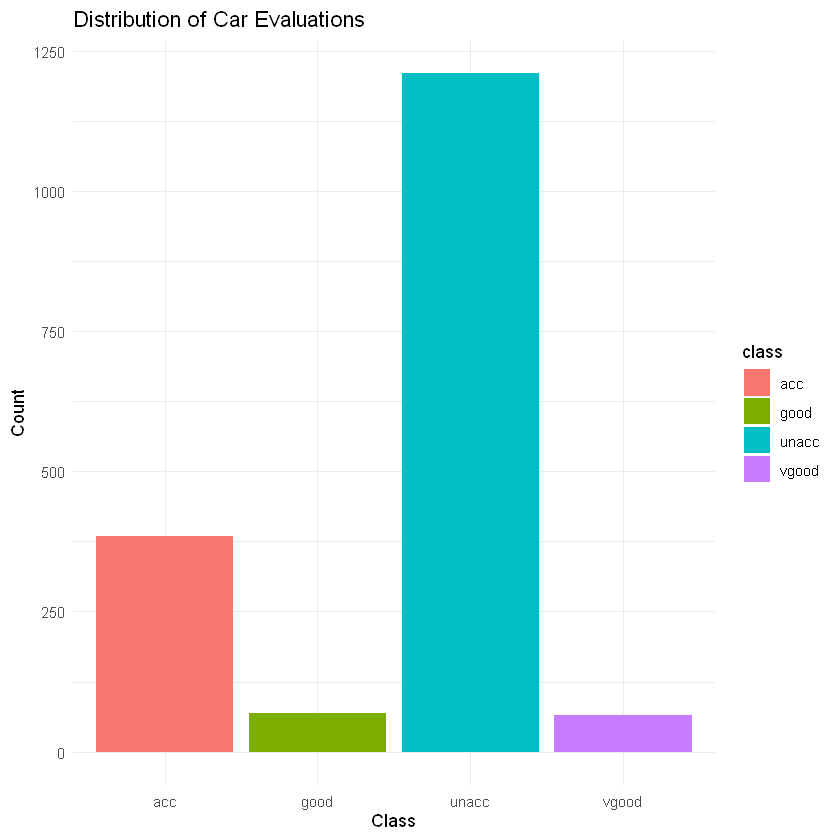

In [6]:
# Frequency distribution of the target variable
table(data$class)

# Visualizing the distribution of class
ggplot(data, aes(x = class, fill = class)) +
  geom_bar() +
  theme_minimal() +
  labs(title = "Distribution of Car Evaluations", x = "Class", y = "Count")

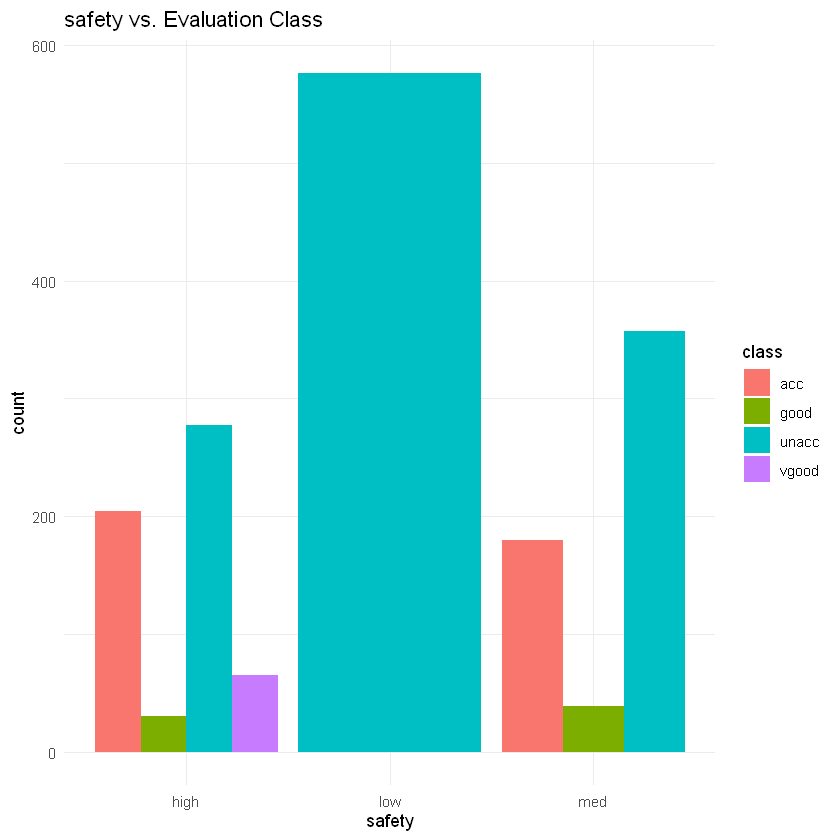

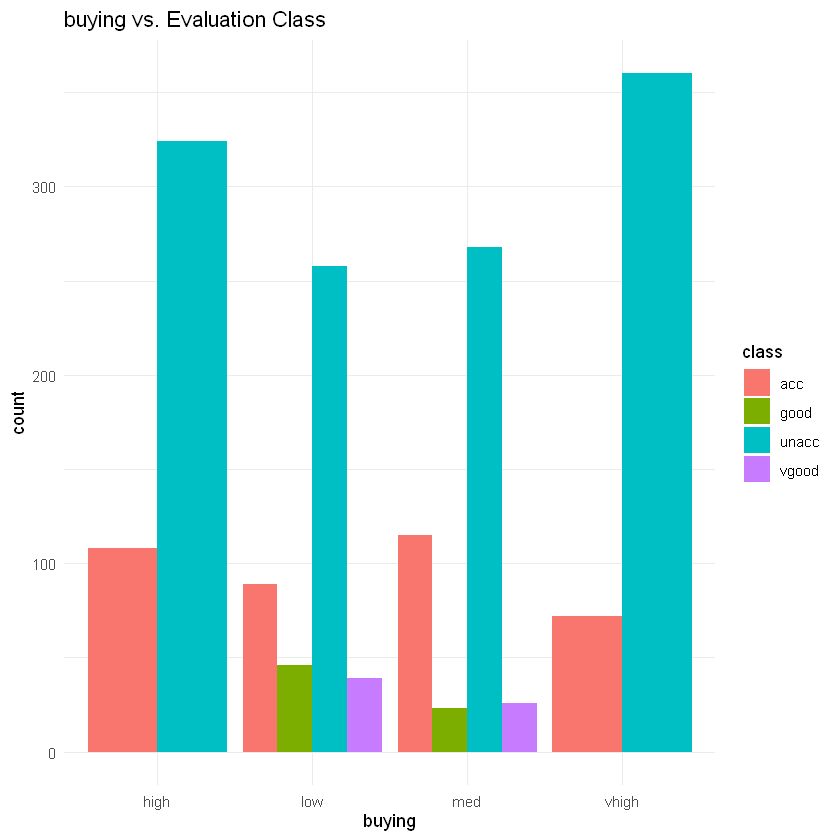

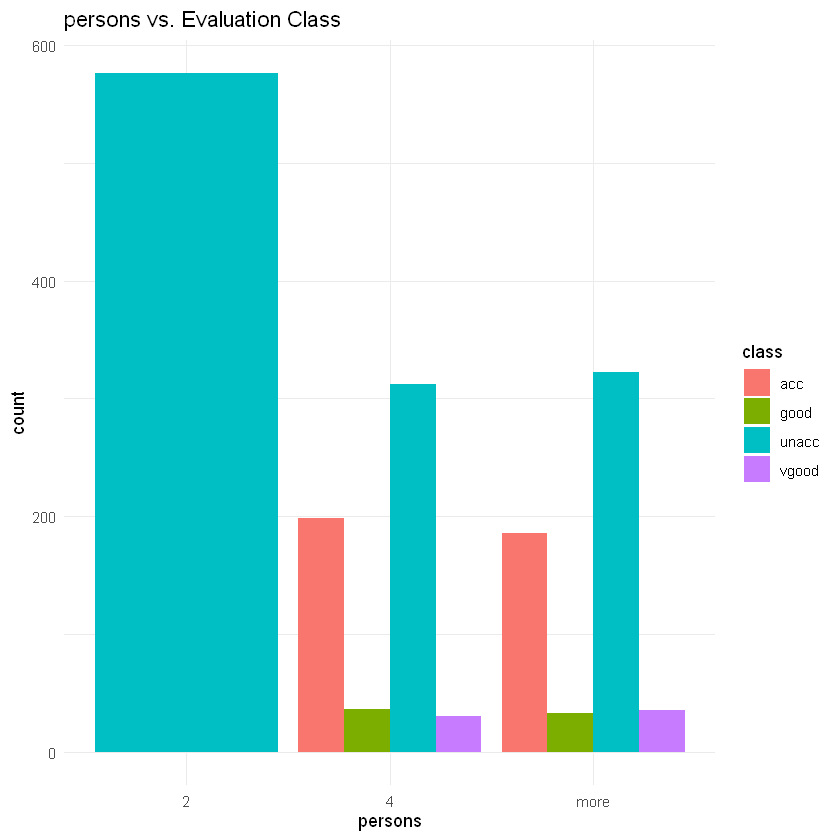

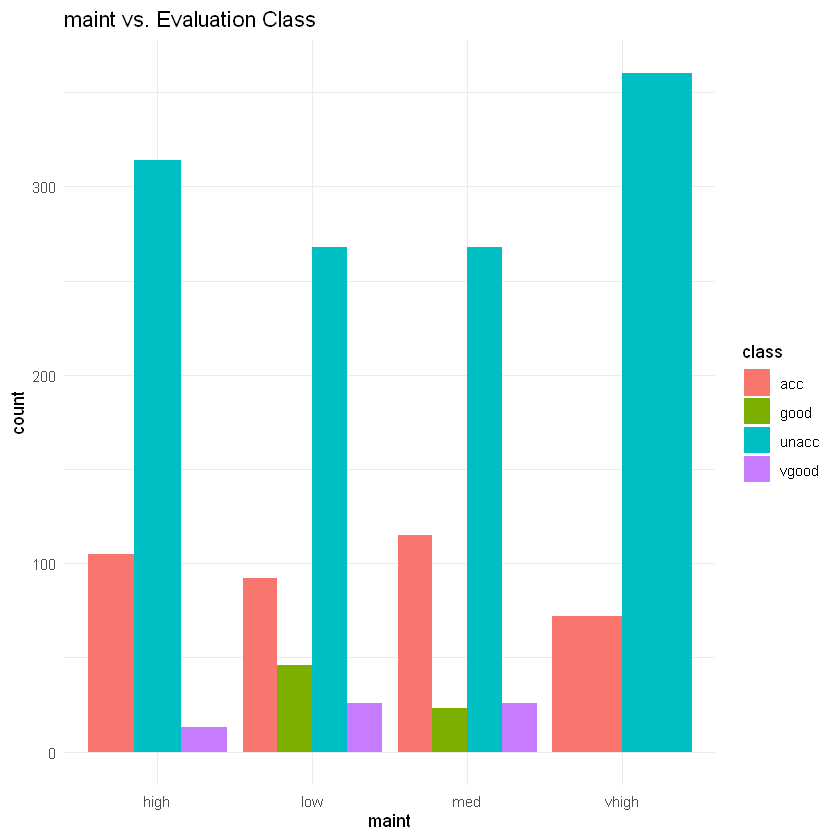

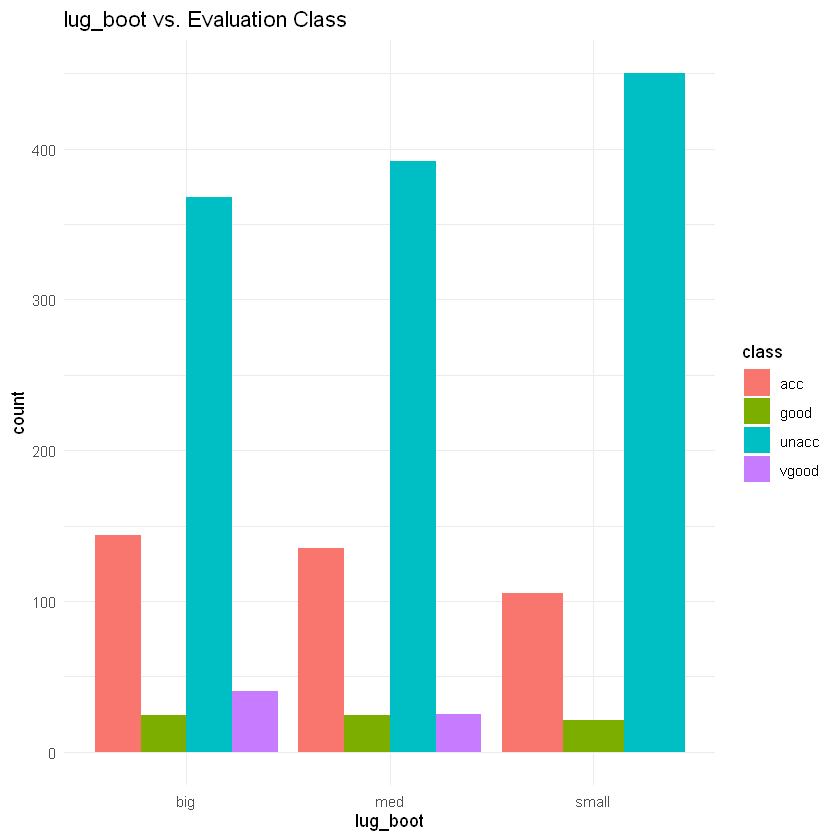

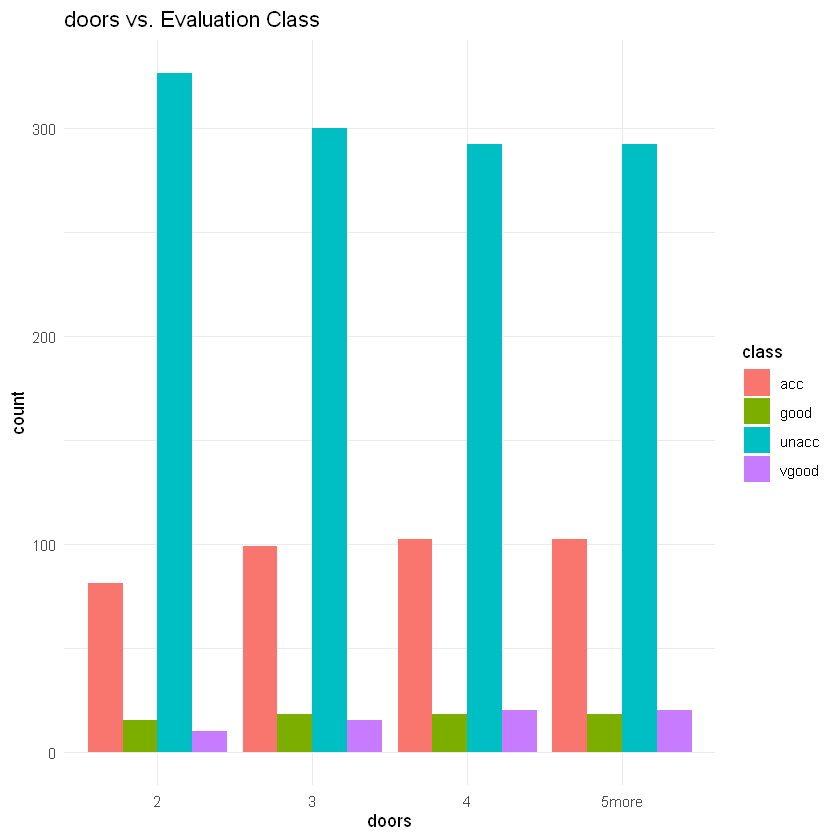

In [7]:
# Visualizing relationships
features <- c("safety", "buying", "persons", "maint", "lug_boot", "doors")
plot_list <- lapply(features, function(feature) {
  ggplot(data, aes(x = .data[[feature]], fill = class)) +
    geom_bar(position = "dodge") +
    theme_minimal() +
    labs(title = paste(feature, "vs. Evaluation Class"))
})

# Display plots separately
for (plot in plot_list) {
  print(plot)
}

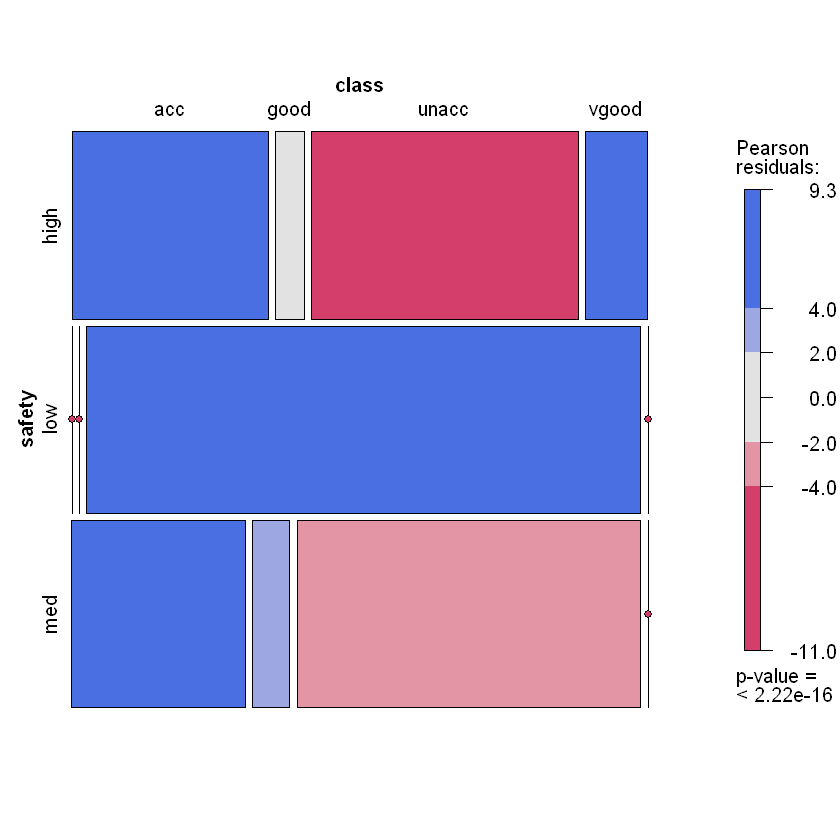

In [8]:
# Mosaic Plot for Pairwise Relationship (optional)
mosaic(~ safety + class, data = data, shade = TRUE, legend = TRUE)


### Feature Engineering and Data Resampling

In [9]:
# Ordinal Encoding of Categorical Variables
ordinal_mapping <- list(
  buying = c("low" = 1, "med" = 2, "high" = 3, "vhigh" = 4),
  maint = c("low" = 1, "med" = 2, "high" = 3, "vhigh" = 4),
  doors = c("2" = 2, "3" = 3, "4" = 4, "5more" = 5),
  persons = c("2" = 2, "4" = 4, "more" = 5),
  lug_boot = c("small" = 1, "med" = 2, "big" = 3),
  safety = c("low" = 1, "med" = 2, "high" = 3),
  class = c("unacc" = 1, "acc" = 2, "good" = 3, "vgood" = 4)
)

df_encoded <- data %>% mutate(across(names(ordinal_mapping), ~ ordinal_mapping[[cur_column()]][.]))

In [10]:
head(df_encoded)

,buying,maint,doors,persons,lug_boot,safety,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,4,2,2,3,2,3
2,4,4,2,2,3,3,3
3,4,4,2,2,3,1,3
4,4,4,2,2,2,2,3
5,4,4,2,2,2,3,3
6,4,4,2,2,2,1,3


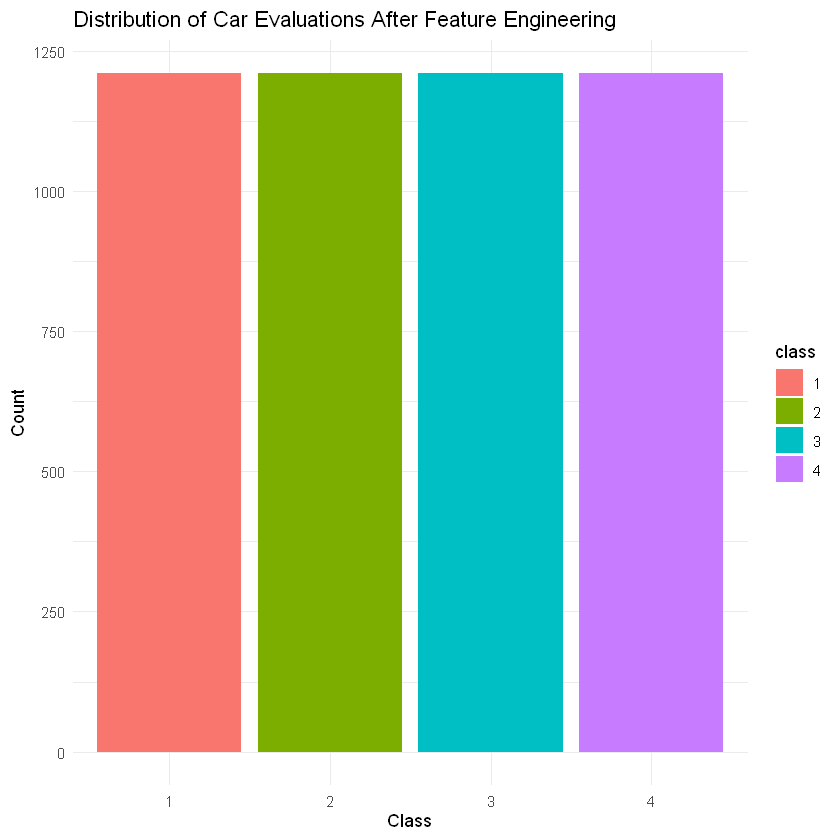

In [11]:
#There is a great imbalance across different classes, introducing SMOTE to generate synthetic samples in order to improve the distribution
df_encoded$class <- as.factor(df_encoded$class)  # Ensure class is a factor

# Create a recipe for SMOTE
smote_recipe <- recipe(class ~ ., data = df_encoded) %>%
  step_smote(class, over_ratio = 1) %>%
  prep() %>%
  bake(new_data = NULL)

df_balanced <- smote_recipe

# Visualizing the distribution of class after SMOTE 
ggplot(df_balanced, aes(x = class, fill = class)) +
  geom_bar() +
  theme_minimal() +
  labs(title = "Distribution of Car Evaluations After Feature Engineering", x = "Class", y = "Count")

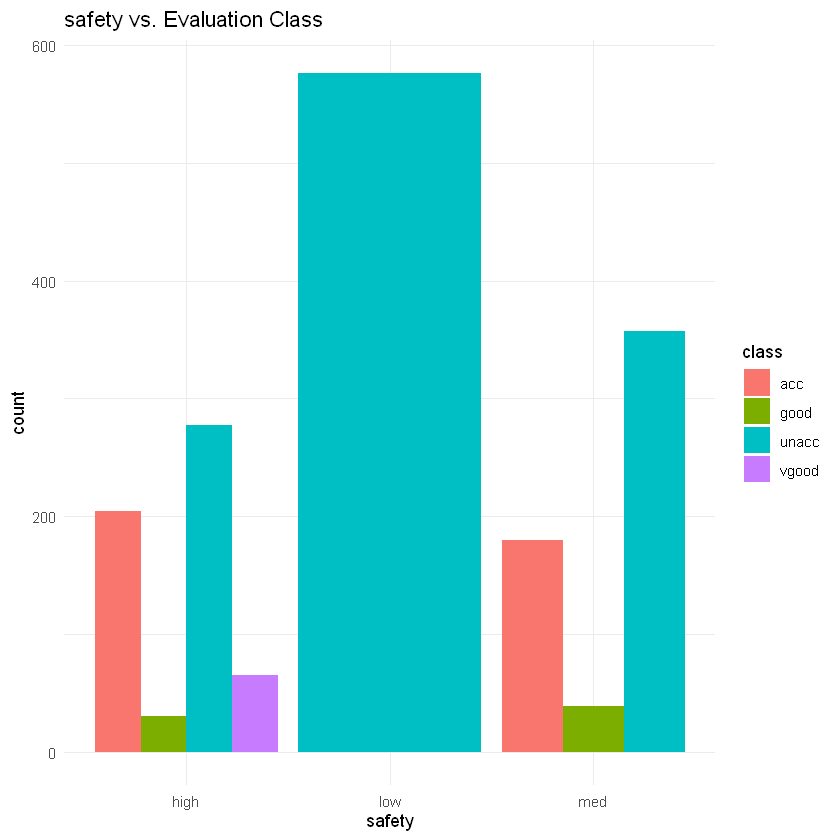

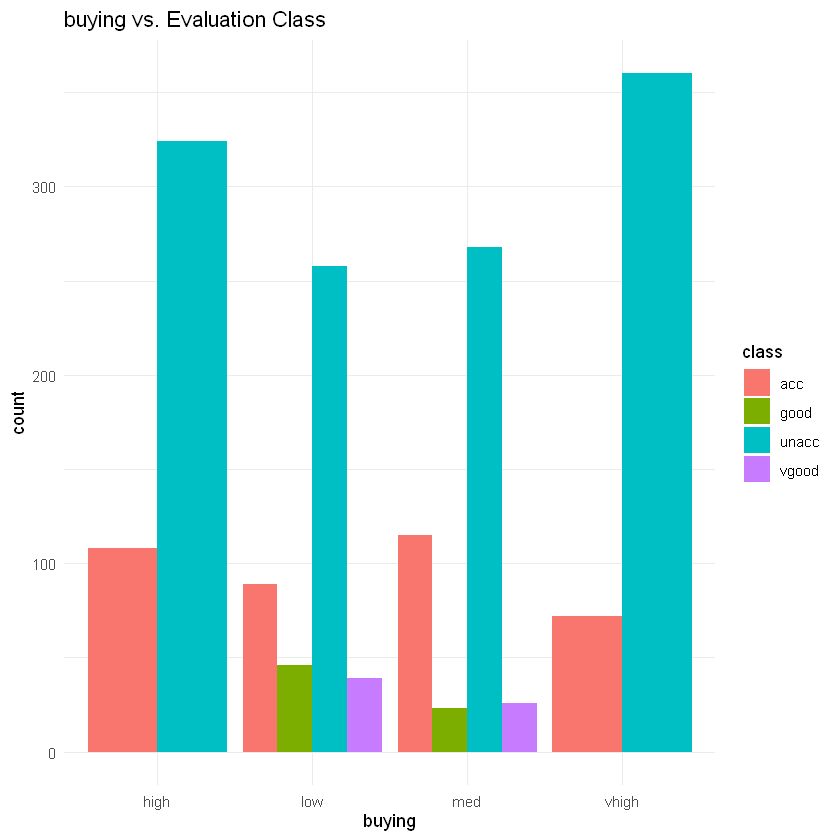

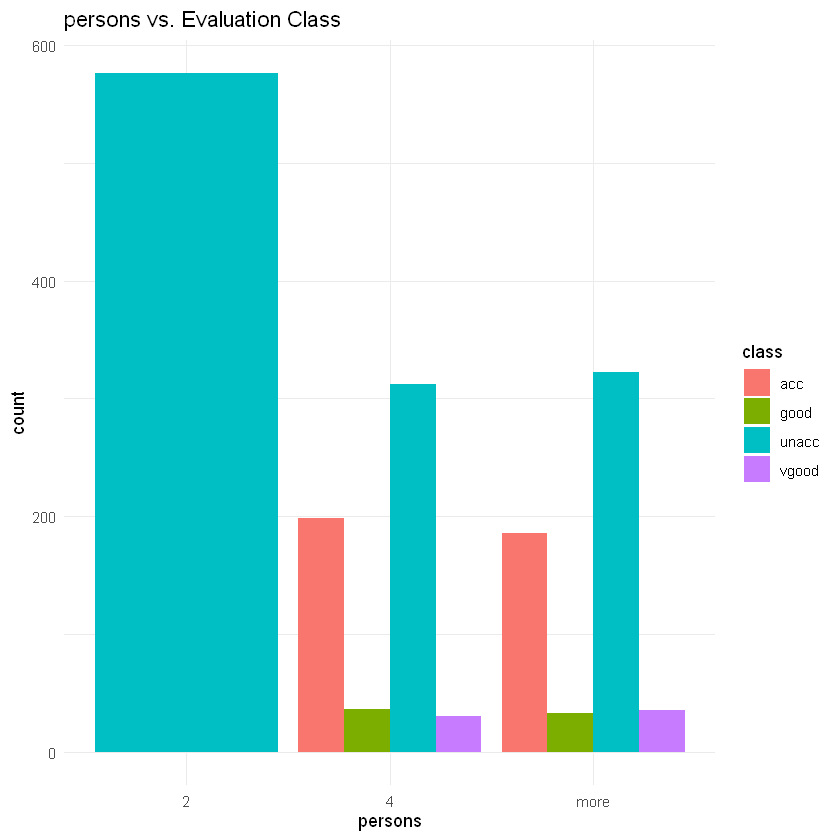

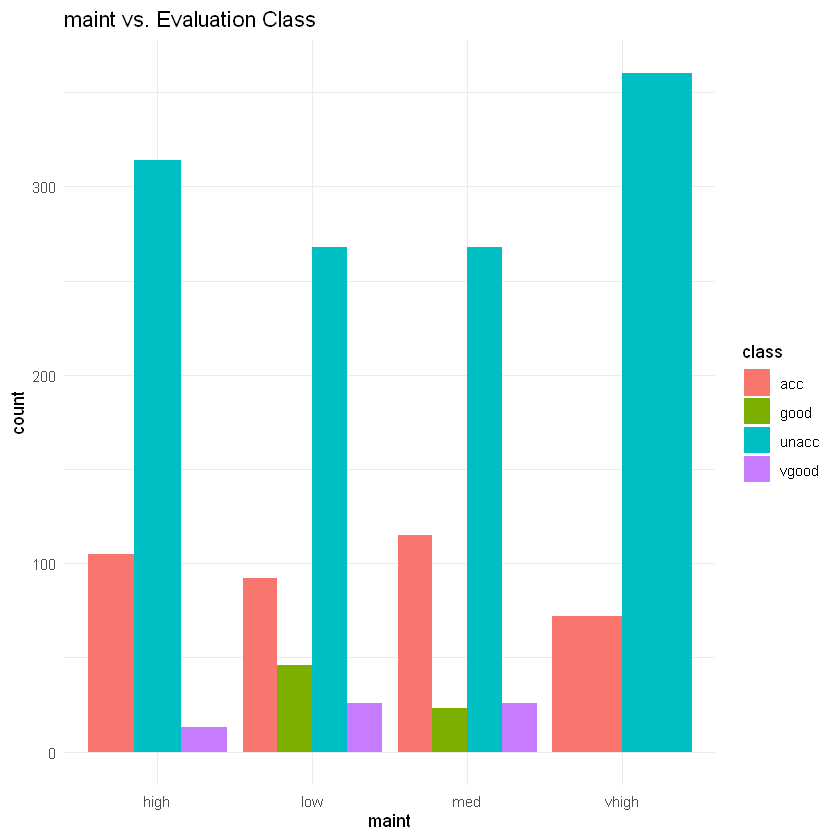

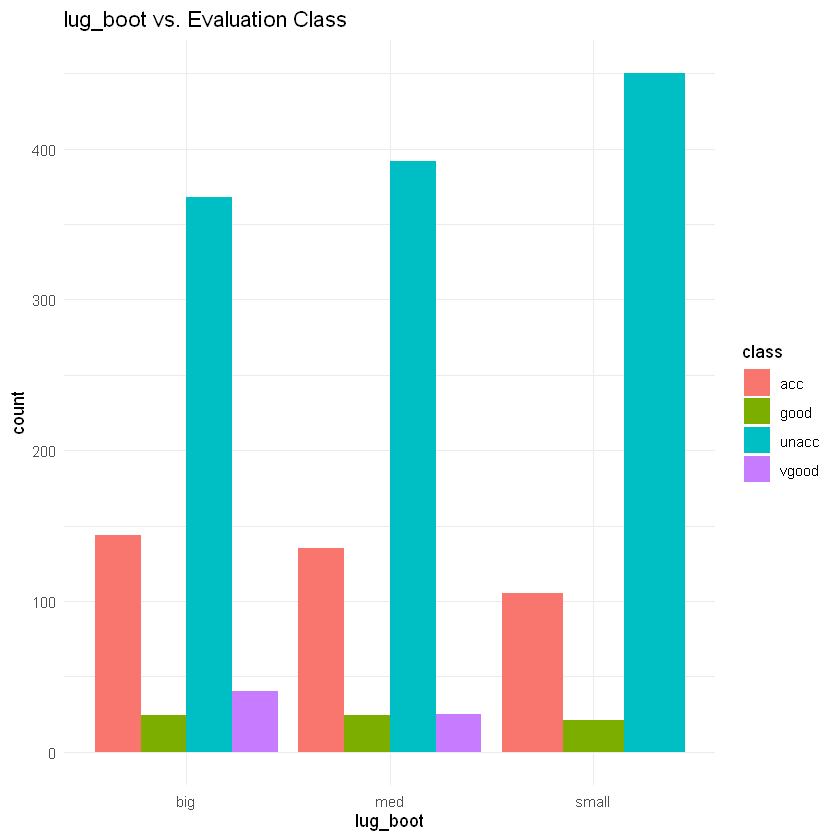

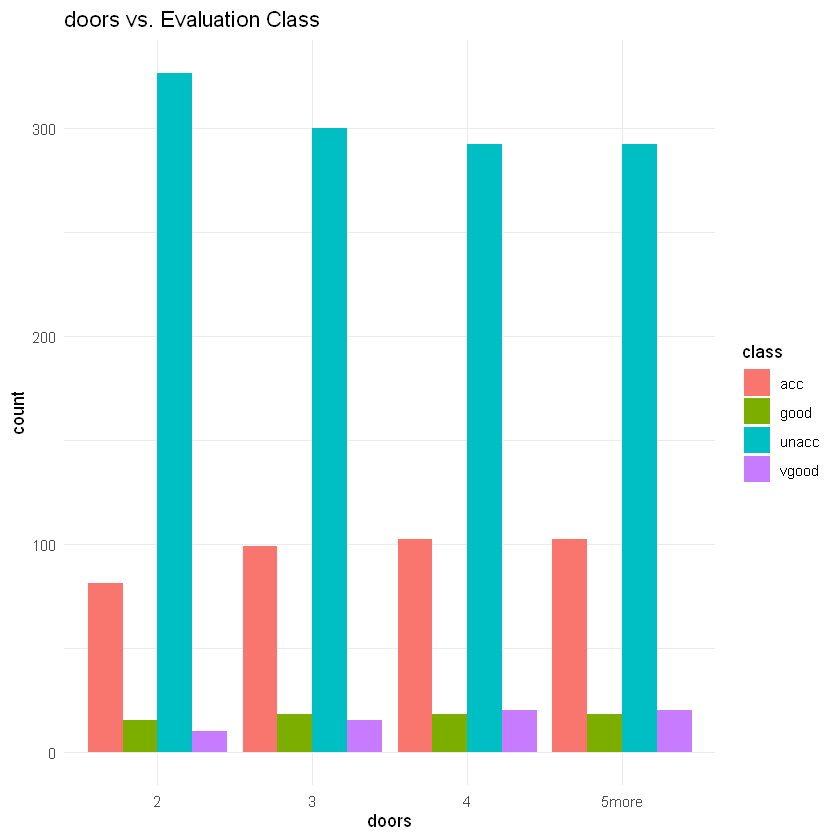

In [12]:
# Visualizing relationships
features <- c("safety", "buying", "persons", "maint", "lug_boot", "doors")
plot_list <- lapply(features, function(feature) {
  ggplot(data, aes(x = .data[[feature]], fill = class)) +
    geom_bar(position = "dodge") +
    theme_minimal() +
    labs(title = paste(feature, "vs. Evaluation Class"))
})

# Display plots separately
for (plot in plot_list) {
  print(plot)
}

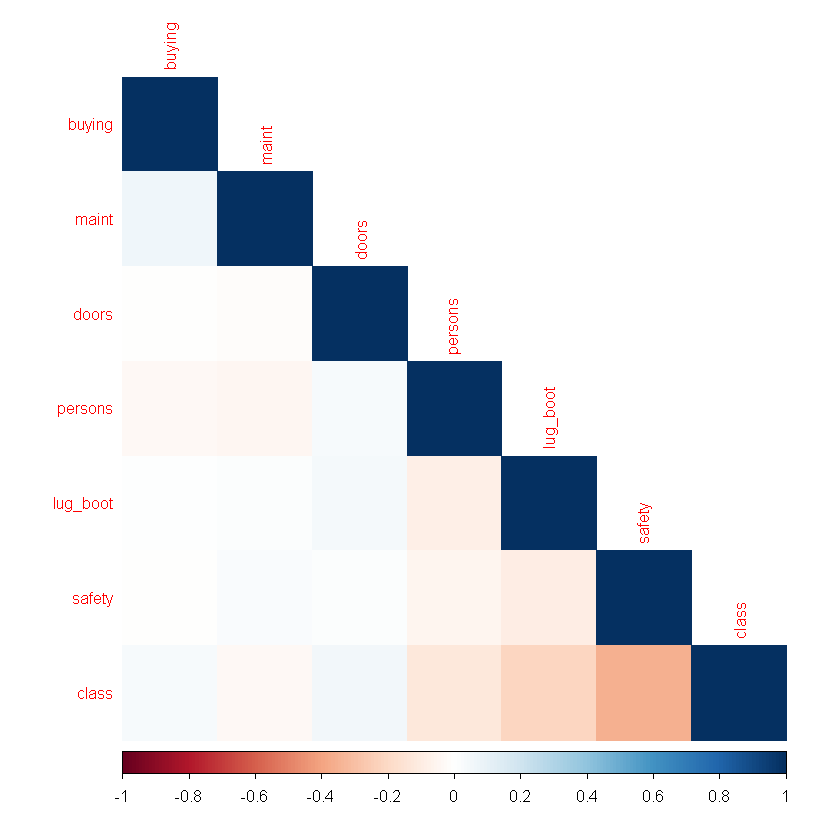

In [13]:
# Correlation Heatmap
corr_matrix <- cor(df_balanced %>% mutate(across(where(is.factor), as.numeric)))
corrplot(corr_matrix, method = "color", type = "lower", tl.cex = 0.8)


### Classification

In [14]:
# Still keep this cell just in case
n <- nrow(data)
trainidx <- sample.int(n, floor(n * .75))
testidx <- setdiff(1:n, trainidx)
train <- data[trainidx, ]
test <- data[testidx, ]
rf <- randomForest(class ~ ., data = train)
bag <- randomForest(class ~ ., data = train, mtry = ncol(data) - 1)
preds <-  tibble(truth = test$class, rf = predict(rf, test), bag = predict(bag, test))

In [15]:
# Still keep this cell just in case
predictions <- predict(rf, test)

conf_matrix <- confusionMatrix(predictions, test$class)
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction acc good unacc vgood
     acc    88    1     2     0
     good    3   12     0     0
     unacc   0    0   312     0
     vgood   0    1     0    13

Overall Statistics
                                          
               Accuracy : 0.9838          
                 95% CI : (0.9669, 0.9935)
    No Information Rate : 0.7269          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9622          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: acc Class: good Class: unacc Class: vgood
Sensitivity              0.9670     0.85714       0.9936      1.00000
Specificity              0.9912     0.99282       1.0000      0.99761
Pos Pred Value           0.9670     0.80000       1.0000      0.92857
Neg Pred Value           0.9912     0.99520       0.9833      1.00000
Prevale

In [16]:
#Applying Random Forest after encoding and balancing the dataset
n <- nrow(df_balanced )
trainidx <- sample.int(n, floor(n * .75))
testidx <- setdiff(1:n, trainidx)
train <- df_balanced[trainidx, ]
test <- df_balanced[testidx, ]
rf <- randomForest(class ~ ., data = train)
bag <- randomForest(class ~ ., data = train, mtry = ncol(data) - 1)
preds <-  tibble(truth = test$class, rf = predict(rf, test), bag = predict(bag, test))

In [17]:
predictions <- predict(rf, test)

conf_matrix <- confusionMatrix(predictions, test$class)
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4
         1 289   0   5   0
         2   3 271   1   0
         3   0   0 287   0
         4   1   0   0 353

Overall Statistics
                                         
               Accuracy : 0.9917         
                 95% CI : (0.9849, 0.996)
    No Information Rate : 0.2917         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9889         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.9863   1.0000   0.9795   1.0000
Specificity            0.9945   0.9957   1.0000   0.9988
Pos Pred Value         0.9830   0.9855   1.0000   0.9972
Neg Pred Value         0.9956   1.0000   0.9935   1.0000
Prevalence             0.2421   0.2240   0.2421   0.2917
Detection Rate         0.2388   0.2240   0.2372  

## Disussion

## References

Canada, F. C. A. of. (2024, January 5). Government of Canada. Canada.ca. https://www.canada.ca/en/financial-consumer-agency/services/loans/financing-car/risks.html

Chiu, L., Du, J., & Wang, N. (2022). The Effects of Price Dispersion on Sales in the Automobile Industry: A Dynamic Panel Analysis. SAGE Open. https://doi.org/10.1177/21582440221120647

Vrkljan, B. H., & Anaby, D. (2011). What vehicle features are considered important when buying an automobile? An examination of driver preferences by age and gender. Journal of Safety Research, 42(1), 61-65. https://doi.org/10.1016/j.jsr.2010.11.006

Bohanec, M. (1988). Car Evaluation [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5JP48.
